# Learned params

In [ ]:
%pip install --upgrade https://github.com/remifan/commplax/archive/master.zip
%pip install --upgrade https://github.com/remifan/LabPtPTm2/archive/master.zip
%pip install --upgrade https://github.com/remifan/gdbp_study/archive/master.zip

In [1]:
import numpy as np
import pandas as pd
from commplax import comm
from gdbp import gdbp_base as gb, plot as gplt, data as gdat

In [2]:
# load data
data_ch1 = gdat.load(1, 1, 1, 2)[0]
data_ch4 = gdat.load(1, 1, 4, 2)[0]

loading data:   0%|          | 0/1 [00:00<?, ?it/s]

loading data:   0%|          | 0/1 [00:00<?, ?it/s]

In [3]:
def train_gdbp(data, dtaps=261, ntaps=41):
  gdbp = gb.model_init(data, {'ntaps': ntaps, 'dtaps': dtaps, 'init_fn': gb.fdbp_init(data.a, xi=1.1, steps=3)}, [])
  params = list(zip(*list(gb.train(gdbp, data, n_iter=2000))))[1]
  return params

In [4]:
# start training 3 cases
params_ch1 = train_gdbp(data_ch1)
params_ch4 = train_gdbp(data_ch4)
params_few_taps = train_gdbp(data_ch4, dtaps=221, ntaps=11)

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

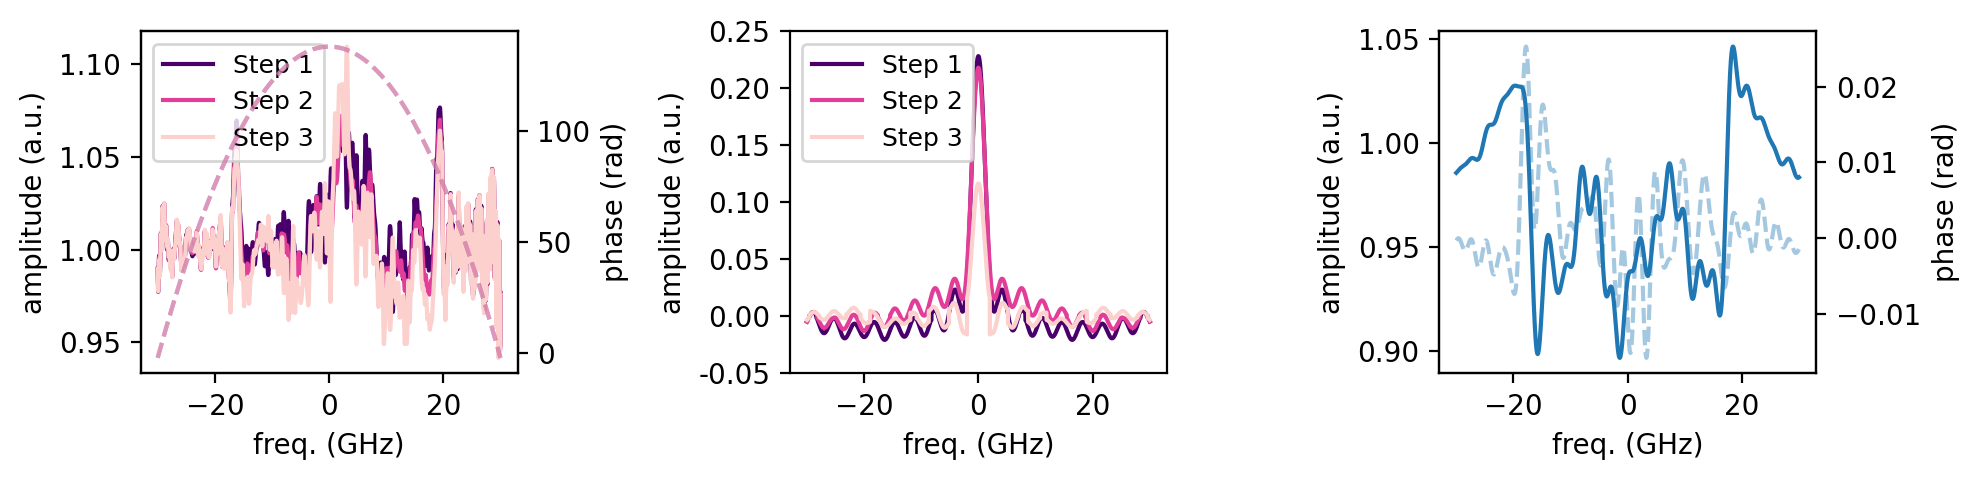

In [8]:
fig = gplt.gdbp_params(params_ch1, dpi=200)

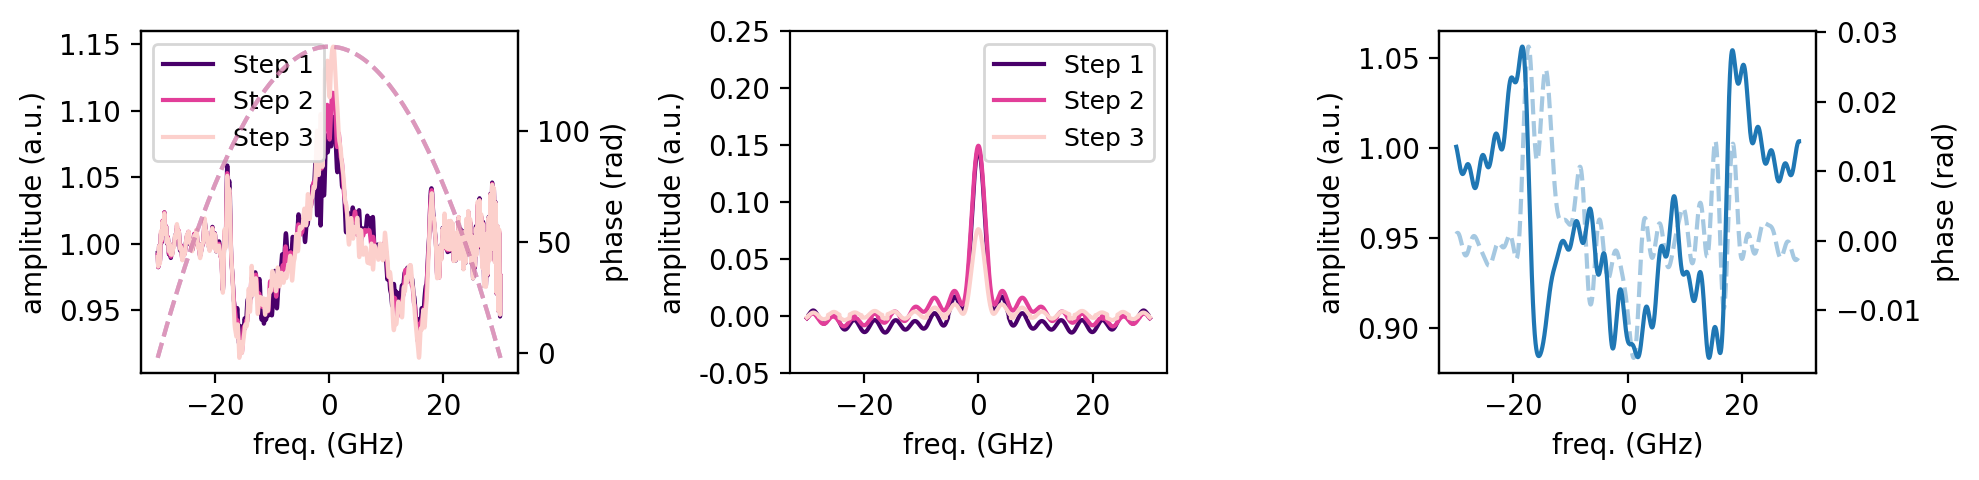

In [10]:
gplt.gdbp_params(params_ch4, dpi=200)

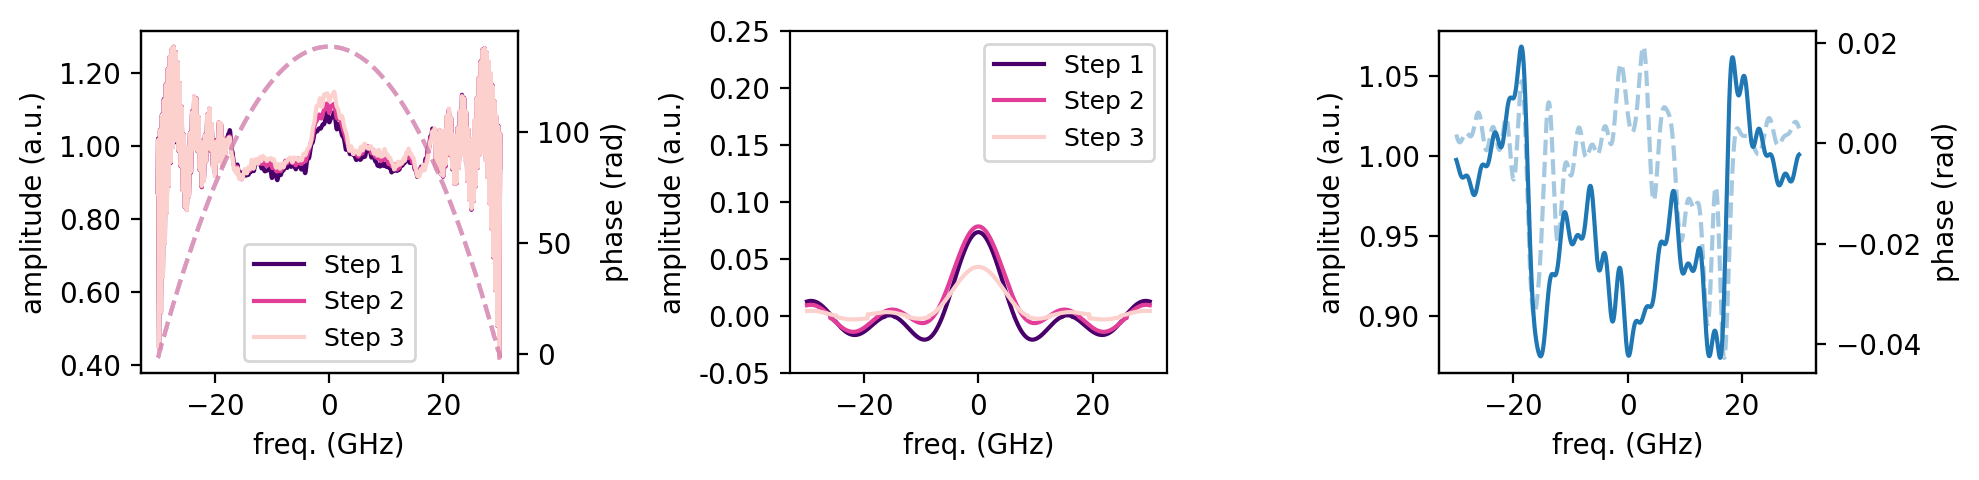

In [11]:
gplt.gdbp_params(params_few_taps, dpi=200)